In [1]:
import sys
sys.path.append("../")
from config_sing import *
show_env()

You are in: Singularity | singularity_proj_combeffect
    BASE DIRECTORY:     /mount/work
    PATH OF SOURCE:     /mount/work/source
    PATH OF EXECUTABLE: /mount/work/exe
    PATH OF ANNOTATION: /mount/work/annotation
    PATH OF PROJECT:    /mount/project
    PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc

Library imported:
    numpy, pandas, matplotlib.pyplot
    os, sys, time, gzip, glob



In [3]:
fdiry = os.path.join(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.perbase.tsv"
fpath = os.path.join(fdiry, fname)

dat_astarr_gata1 = pd.read_csv(fpath, sep="\t")

In [4]:
dat_astarr_gata1.head()

,Chrom,Loc,Sample,Group,Replicate,Region,Depth,Size,Depth_Norm
0,chrX,47786400,Input_rep1,Input,rep1,GATA1,0,358823,0.0
1,chrX,47786401,Input_rep1,Input,rep1,GATA1,0,358823,0.0
2,chrX,47786402,Input_rep1,Input,rep1,GATA1,0,358823,0.0
3,chrX,47786403,Input_rep1,Input,rep1,GATA1,0,358823,0.0
4,chrX,47786404,Input_rep1,Input,rep1,GATA1,0,358823,0.0


```
start  = 48780000
end    = 48826000

dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(start < Loc, Loc < end)
dat = dat %>% dplyr::filter(Replicate %in% c("rep1", "rep2", "rep3", "rep4"))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Depth_Norm, Sample) %>% 
    spread(Sample, Depth_Norm) %>%
    mutate(
        Rep1 = log2((Output_rep1 + 10) / (Input_rep1 + 10)),
        Rep2 = log2((Output_rep2 + 10) / (Input_rep2 + 10)),
        Rep3 = log2((Output_rep3 + 10) / (Input_rep3 + 10)),
        Rep4 = log2((Output_rep4 + 10) / (Input_rep4 + 10)))

dat = dat %>% 
    dplyr::select(Chrom, Loc, Rep1, Rep2, Rep3, Rep4) %>%
    gather(Sample, Value, -Chrom, -Loc)
head(dat)
```

In [7]:
start  = 48780000
end    = 48826000

dat = dat_astarr_gata1
idx = (dat['Loc'] >= start) & (dat['Loc'] <= end)
jdx = ["Chrom", "Loc", "Depth_Norm", "Sample"]
dat = dat.loc[idx,jdx]
dat.head()

,Chrom,Loc,Depth_Norm,Sample
993600,chrX,48780000,0.000190,Input_rep1
993601,chrX,48780001,0.000176,Input_rep1
993602,chrX,48780002,0.000176,Input_rep1
993603,chrX,48780003,0.000173,Input_rep1
993604,chrX,48780004,0.000173,Input_rep1


In [10]:
dat.tail()

,Chrom,Loc,Depth_Norm,Sample
19042746,chrX,48825996,0.000135,Output_rep4
19042747,chrX,48825997,0.000135,Output_rep4
19042748,chrX,48825998,0.000135,Output_rep4
19042749,chrX,48825999,0.000135,Output_rep4
19042750,chrX,48826000,0.000135,Output_rep4


In [12]:
tmp = pd.pivot_table(data=dat, values='Depth_Norm', columns = "Sample", index = ["Chrom", "Loc"])
tmp.head()

Sample          Input_rep1  Input_rep2  Input_rep3  Input_rep4  Input_rep5  \
Chrom Loc                                                                    
chrX  48780000    0.000190    0.000186    0.000193    0.000202    0.000185   
      48780001    0.000176    0.000178    0.000181    0.000196    0.000167   
      48780002    0.000176    0.000180    0.000181    0.000196    0.000170   
      48780003    0.000173    0.000175    0.000177    0.000187    0.000167   
      48780004    0.000173    0.000175    0.000177    0.000187    0.000167   

Sample          Input_rep6  Output_rep1  Output_rep2  Output_rep3  Output_rep4  
Chrom Loc                                                                       
chrX  48780000    0.000193     0.000210     0.000111     0.000179     0.000172  
      48780001    0.000181     0.000077     0.000082     0.000179     0.000146  
      48780002    0.000183     0.000077     0.000082     0.000179     0.000162  
      48780003    0.000181     0.000077     0.000082     0.000154     0.000134  
      48780004    0.000181     0.000077     0.000082     0.000154     0.000134

In [13]:
tmp.shape

(46001, 10)

In [16]:
tmp = pd.pivot_table(data=dat, values='Depth_Norm', columns = "Sample", index = ["Chrom", "Loc"])
tmp = tmp.assign(
    Rep1 = lambda df: np.log2((df["Output_rep1"] + 10) / (df["Input_rep1"] + 10)))

tmp.head()

Sample          Input_rep1  Input_rep2  Input_rep3  Input_rep4  Input_rep5  \
Chrom Loc                                                                    
chrX  48780000    0.000190    0.000186    0.000193    0.000202    0.000185   
      48780001    0.000176    0.000178    0.000181    0.000196    0.000167   
      48780002    0.000176    0.000180    0.000181    0.000196    0.000170   
      48780003    0.000173    0.000175    0.000177    0.000187    0.000167   
      48780004    0.000173    0.000175    0.000177    0.000187    0.000167   

Sample          Input_rep6  Output_rep1  Output_rep2  Output_rep3  \
Chrom Loc                                                           
chrX  48780000    0.000193     0.000210     0.000111     0.000179   
      48780001    0.000181     0.000077     0.000082     0.000179   
      48780002    0.000183     0.000077     0.000082     0.000179   
      48780003    0.000181     0.000077     0.000082     0.000154   
      48780004    0.000181     0.000077     0.000082     0.000154   

Sample          Output_rep4      Rep1  
Chrom Loc                              
chrX  48780000     0.000172  0.000003  
      48780001     0.000146 -0.000014  
      48780002     0.000162 -0.000014  
      48780003     0.000134 -0.000014  
      48780004     0.000134 -0.000014

In [17]:
tmp = tmp.reset_index()
tmp.head()

Sample,Chrom,Loc,Input_rep1,Input_rep2,Input_rep3,Input_rep4,Input_rep5,Input_rep6,Output_rep1,Output_rep2,Output_rep3,Output_rep4,Rep1
0,chrX,48780000,0.000190,0.000186,0.000193,0.000202,0.000185,0.000193,0.000210,0.000111,0.000179,0.000172,0.000003
1,chrX,48780001,0.000176,0.000178,0.000181,0.000196,0.000167,0.000181,0.000077,0.000082,0.000179,0.000146,-0.000014
2,chrX,48780002,0.000176,0.000180,0.000181,0.000196,0.000170,0.000183,0.000077,0.000082,0.000179,0.000162,-0.000014
3,chrX,48780003,0.000173,0.000175,0.000177,0.000187,0.000167,0.000181,0.000077,0.000082,0.000154,0.000134,-0.000014
4,chrX,48780004,0.000173,0.000175,0.000177,0.000187,0.000167,0.000181,0.000077,0.000082,0.000154,0.000134,-0.000014


In [25]:
import ipywidgets as widgets
from IPython.display import display

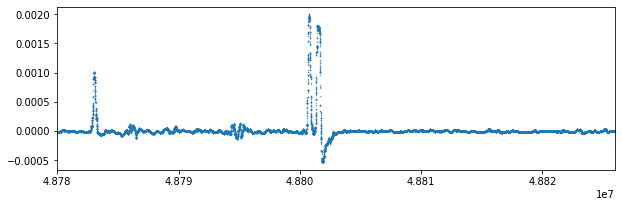

In [23]:
xmin = start
xmax = end
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ax.scatter(x = tmp["Loc"], y = tmp["Rep1"], s = 0.1)
ax.set_xlim(xmin, xmax)
plt.show()

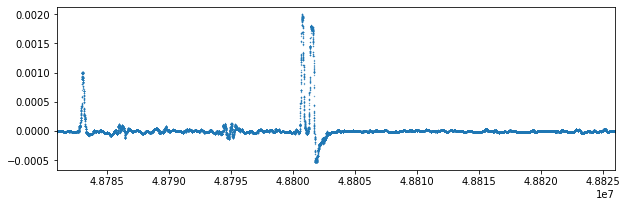

In [24]:
xmin = start+1000
xmax = end
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
ax.scatter(x = tmp["Loc"], y = tmp["Rep1"], s = 0.1)
ax.set_xlim(xmin, xmax)
plt.show()

In [69]:
x1 = widgets.IntSlider(start, start, end)
x2 = widgets.IntSlider(end,   start, end)
step = widgets.IntSlider(1,   1,     101, 10)
display(x1)
display(x2)
display(step)

IntSlider(value=48780000, max=48826000, min=48780000)

IntSlider(value=48826000, max=48826000, min=48780000)

IntSlider(value=1, max=101, min=1, step=10)

In [70]:
def fun(x1=start, x2=end, step=1):
    xmin = np.min([x1, x2])
    xmax = np.max([x1, x2])
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
    x = tmp['Loc' ][::step]
    y = tmp['Rep1'][::step]
    #ax.scatter(x = tmp["Loc"], y = tmp["Rep1"], s = 0.1)
    ax.plot(x, y)
    ax.set_xlim(xmin, xmax)
    plt.show()

In [71]:
widgets.interact(fun, x1=x1, x2=x2, step=step); # min, max

interactive(children=(IntSlider(value=48780000, description='x1', max=48826000, min=48780000), IntSlider(value…

In [57]:
[1, 2, 3, 5, 6, 10, 11][::2]

[1, 3, 6, 11]